# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [5]:
print prices.head()
print "** len(prices):",len(prices)
print "^^ data.columns:",data.columns
print "type(data):::",type(data)
print "type(prices) : ",type(prices)


0    504000
1    453600
2    728700
3    701400
4    760200
Name: MDEV, dtype: float64
** len(prices): 489
^^ data.columns: Index([u'RM', u'LSTAT', u'PTRATIO', u'MDEV'], dtype='object')
type(data)::: <class 'pandas.core.frame.DataFrame'>
type(prices) :  <class 'pandas.core.series.Series'>


In [10]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
# Updated to population standard deviation numpy.std()
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "*** Updated answer Question 1 ***"
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
*** Updated answer Quiz 1 ***
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
* 'RM' feature has a positive correlationship with the value of 'MDEV' since the value of house with more rooms , has high probability of high price tag in the market.('RM' value of 6 be worth less than a home that has an 'RM' value of 7)
* 'LSTAT'(greater net worth than in neighborhood) may have a negative relationship with the house price, since higher income comparing the average income in the county has a tendency of living in house with higher price
* 'PTRATIO' slightly negative relationship with the house price since teacher vs student ratio has little effect on the house price.

For the clarification for the ralationship between feature and actual outcome, I attached 3 graphs

* blue dot is matrix of feature (x_test,x axis value) and house price(y_test, y axis value). 
* red lin denotes the relationship between  feature(x_test, x axis value) vs. predition of house price(prediction of x_test, y axis value).
1. First Graph,'RM' and price has a positive relation it means a house price increases as a'RM' increases.
2. Second Graph, Feature('LSTAT') vs actual price('MDEV) denotes negative relationship between LSAT and MDEV
3. Thrid Graph, Features('PTRATIO') vs. MDEV denotes slight negative relationship between LSAT and MDEV

#### Graph 1 : RM vs. MDEV

Automatically created module for IPython interactive environment
('Coefficients: \n', array([ 177771.12331961]))
Residual sum of squares: 13838040377.75
Variance score: 0.44


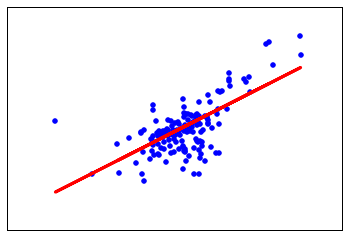

In [24]:
# feature 'RM', splitting data to train, test and traing accordingly.

print(__doc__)


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

#feature is 'RM': NUMBER OF ROOM
X = features[['RM']][:]
y = prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
# feature vs. actual price
plt.scatter(X_test, y_test,  color='blue')  
# feature vs. prediction
plt.plot(X_test, regr.predict(X_test), color='red',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Graph 2 : LSTAT vs. MDEV

('Coefficients: \n', array([-17436.44945931]))
Residual sum of squares: 11026996920.72
Variance score: 0.55


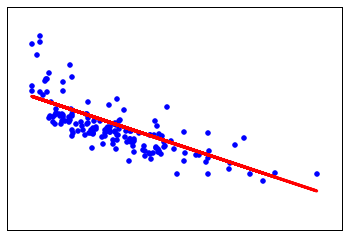

In [25]:
#feature is 'LSTAT': 
X = features[['LSTAT']][:]
y = prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regr.predict(X_test), color='red',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Graph 3 : PTRATIO vs. MDEV

('Coefficients: \n', array([-40208.04425579]))
Residual sum of squares: 18562888532.06
Variance score: 0.25


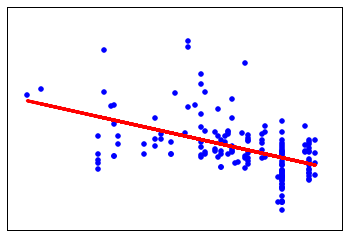

In [26]:
#feature is 'PTRATIO': 
X = features[['PTRATIO']][:]
y = prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regr.predict(X_test), color='red',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [27]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

#### Question 2 :updated answer 

In [28]:
# Calculate the performance of this model

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**Coefficient of determination, R^2, of 0.923. So, I consider this model captured the variation of the target variable successfully in the follwing aspects.
 *  R-squared is a statistical measure of how close the data are to the fitted regression line ,in other words, how well the  regression line approximates the real data points as a range of 0% to 100 %(coefficient determinations : 0 to 1)
  An R-squared score of 1 indicates that the regression line perfectly fits the data, So this model with  R^2 of 0.923, which is shy of 1 means the sucesseful capture of the variation of the target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [29]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **Even if we made a good predict model , it was based on existing data. It means it does not gurantee the predictibility of the real world's future happening. In order to check a predictive model to perform on future data, we need to try to simulate this eventuality and compare predictions from the model with the outcomes of actual world. 
For this reason, We split a dataset into some ratio of training and testing subsets randomly, devolping models on this traing  sets and using the other testing sets for predictive model assement and possibly model refinement.
 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

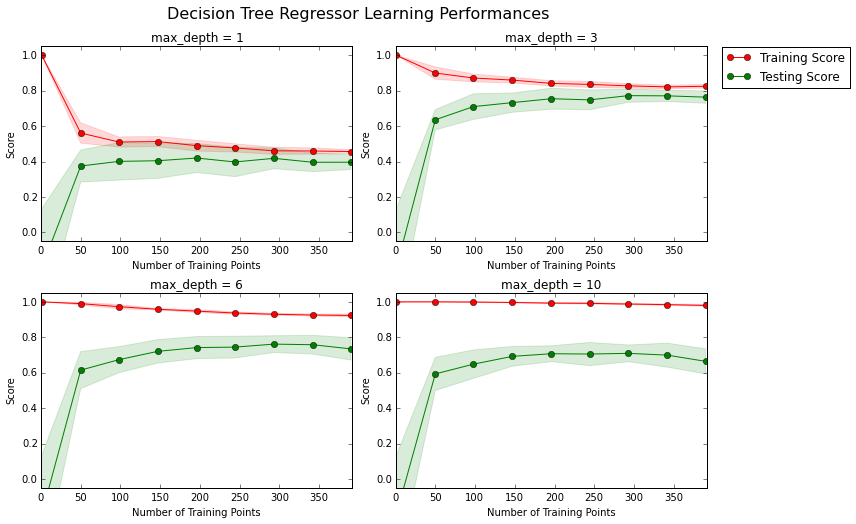

In [81]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

#### Question4 : updated answer

**Answer: **

In max depth3, the score of the training curve declines but testing curve increase,as more training points are added and then converged. 

Learning curve determines cross-validated training and test scores for different training set sizes by the value of R-squared, a statistical measure of how close the data are to the fitted regression line.
In general, a model fits the data well if the differences between the observed values and the model's predicted values are small and unbiased. 

Increasing the training set will not benefit the model. Genarally speaking, with more training points, it becomes harder for the model to fit the training data, so the training error goes up(lower traing score). On the other hand, with more data, the model becomes better at generalizing, the testing error goes down(higher traing score). But at certain points,after 250 training set in this model, this model does not imporve due to no more performance improvement from testing score and the burden of increased computation time of traing set.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

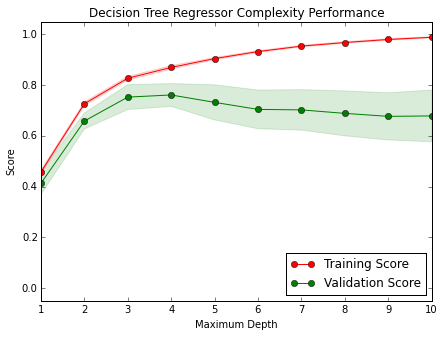

In [82]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

#### Question 5 : updated

**Answer: **In the case of model trained with a maximum depth of 1, the model suffer from high bias and that of maximum depth of 10 suffer from high variance.

Since Model with high bias and small variance will underfit the truth target,which result in the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. Model 1 shows low perdictions score and low validations score.

Model with high variance and low bias will overfit the truth target, which results in the high variance of the predictions for a given point vary between different realizations of the model. Model with max depth 10 shows big variance difference traing score and validation score.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **maximum depth 4 
* The model with max depth 4 has larger combined number of training score and validation score since  the validation score is convex point from which poiint the validation score starts declining even though the training score is still increasing. It makes the maximum depth 4 model, the best generalizes to unseen data.
Model with less than maximum depth 4 such as 1,2,3 has smaller number of training score plus validation score combined than model maximun depth 4.
Model with more than maximum depth 4 such as 6, 10 have a tendency of declining of validatin score due to overfitting , which makes unseen data have smaller validation score.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** grid search is the exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.
* Grid-search is performed by simply picking a list of values for each parameter, and trying out all possible combinations of these values. This might look methodical and exhaustive.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. 

* Cross-validation is a method for robustly estimating test-set performance (generalization) of a model. Grid-search is a way to select the best of a family of models, parametrized by a grid of parameters.
If using grid search without a cross-validated set( defaut is 3 cross-validation), The best model can't be chosen by default. 



In [30]:
#ref 
from sklearn.datasets import load_boston
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10)

from sklearn import svm, grid_search, datasets
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [34]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {}
    params = {'max_depth':range(1,11)}
    #params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    #Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets,verbose=0)

    # Fit the grid search object to the data to compute the optimal model
    grid= grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [35]:
# Fit the training data to the model using grid search
# print X_train
# print y_train

reg = fit_model(X_train, y_train)

#Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **Parameter 'max_depth' is 4 for the optimal model. same as question 6

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [36]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $344,400.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: ** 
* These prices seem reasonable given values for respective features because feature 'RM' (Total number of rooms in home) has a positive correlationship with the value of 'MDEV'(house price). but other features such as "Household net worth (income)" and "Student-teacher ratio of nearby schools" has little relationship with the house price.
* It is all resonable that among 3 clients, client with 8 rooms has the highest price, \$ 931,636.36 and client1 with room 5 has second highest price, \$344,400.00 and then cient2 with room 4 has the lowes price, \$ 237,478.72.  

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [37]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $302,400.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

Sensitivity analysis of a suitably-trained precition model can determine a set of input variables which have greater
influence on the output variable. 

 For example, sensitivity analysis was conducted in order to discover important variables that influence sales performance of color TV sets in the market with the prediction model. 
It was found that the average price, screen size, flat square, stereo and seasonal factors were most influential on the sale revenue. 
This is consistent with the 4P (Product, Price,Place, and Promotion) marketing mix.

Applicability is that the constructed model should be used in real-word setting.
Assume I splited data into traing data and test data and tranined train data and then  I build the model using training set. After it was done, I use the model to predict the test set. the training set and test set should be similar in data structure to provide good predictibility but I apply the model in real word data, sometimes the predictions results are worse than I expected.
Such indicents can be caused by several factors such as old training data not to reflect the present status, not suffient features to result in lack of consistency(bias noise), too many features to result in overfitting, training data with differnet applicable domains.



As far as the constructed model is concerned, there is some points to consider to apply to the real world setting such as
time, number of features, robustness of consistent predictions, regional applicability.
1. Outdated training data set can be a major factor to be a negative effect on prediction accuracy for the present real-word validation data set.

2. The features presented in the data is not sufficient to descirbe a home , specially to predict house price.
Besides feature suggested in question 10 such as room number, Household net worth (income) and Student-teacher ratio of nearby schools, there can be additional features to enhance the predictibility of house price such as number of bathroom, square feet of house and so on.

3. The model is not robust enough to make a prediction consisty.
As I run  fit_model 10 times , I found the price Range between outcome prices is $118,222.22, whihc means the lack of prediction consistency. 

4. Data collected in an urban city like Boston is hard to appliy in a rural city.
  If the test set is not located the data domain of the training set(in Boston), then the prediction result for the test set(in urban city) should be worse than those in the train set domain